In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

import random
import math

## Data one

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,followers,avg_engagement,engagement_number,amount
0,3000,5.40,16200.0,2500
1,10000,4.90,49000.0,7000
2,35000,3.20,112000.0,14500
3,75000,2.95,221250.0,24000
4,130000,3.36,436800.0,38000


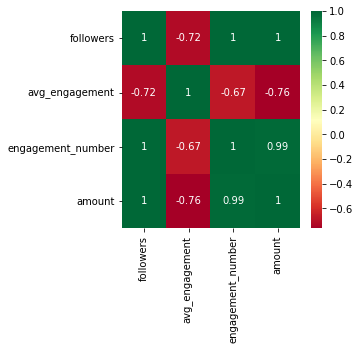

In [3]:
# Data from different buckets
insta_video_df = pd.DataFrame(columns=["followers","avg_engagement","engagement_number","amount"])

# Push data
insta_video_df.followers = [3000,10000,35000,75000,130000]
insta_video_df.avg_engagement = [5.4,4.9,3.2,2.95,3.36]
insta_video_df.engagement_number = [0]*5
insta_video_df.amount = [2500,7000,14500,24000,38000]    

for i in insta_video_df.index:
    insta_video_df.engagement_number.loc[i] = insta_video_df.followers.loc[i]*insta_video_df.avg_engagement.loc[i]
    
display(insta_video_df)

#Heatmap
corrmat = insta_video_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(4,4))
#plot heat map
g=sns.heatmap(insta_video_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Data two with training

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,followers,avg_engagement,engagement_number,amount
0,3000,2.0,6000.0,740
1,3000,5.0,15000.0,800
2,3000,10.0,30000.0,850
3,10000,5.0,50000.0,2470
4,10000,10.0,100000.0,2800
5,10000,14.0,140000.0,3000
6,35000,5.0,175000.0,8636
7,35000,7.0,245000.0,8750
8,35000,10.0,350000.0,8900
9,75000,3.0,225000.0,18500


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

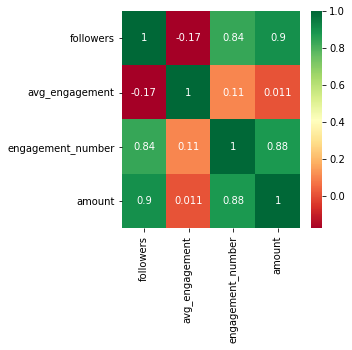

In [5]:
# Data from different buckets
insta_video_df = pd.DataFrame(columns=["followers","avg_engagement","engagement_number","amount"])

# Push data
insta_video_df.followers = [3000,3000,3000,10000,10000,10000,35000,35000,35000,75000,75000,75000,130000,130000,130000,130000,1200000,1200000,1200000,2600000,2600000]
insta_video_df.avg_engagement = [2,5,10,5,10,14,5,7,10,3,6,10,3,5.4,7,12,2,4,6.4,2.9,10]
insta_video_df.engagement_number = [0]*21
insta_video_df.amount = [740,800,850,2470,2800,3000,8636,8750,8900,18500,19400,19900,32000,34000,35000,375000,290000,400000,800000,640000,1000000]    

for i in insta_video_df.index:
    insta_video_df.engagement_number.loc[i] = insta_video_df.followers.loc[i]*insta_video_df.avg_engagement.loc[i]
    
display(insta_video_df)

#Heatmap
corrmat = insta_video_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(4,4))
#plot heat map
g=sns.heatmap(insta_video_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

X = insta_video_df[["followers","engagement_number"]]
y = insta_video_df['amount'].values

model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)

Predicted:  [167185.34985219]
coefficient:  [0.21900015 0.02075418]
intercept:  0.0


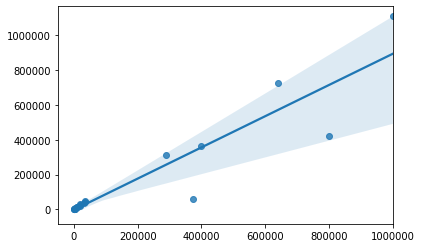

In [6]:
#Manual Check
influ_followers = 760520
engg_num = (influ_followers/100)*4
print("Predicted: ",model2.predict([[influ_followers,engg_num]]))

# Coefficients
print("coefficient: ",model2.coef_)
print("intercept: ",model2.intercept_)

# Ploting
pred_amount = model2.predict(X)
sns.regplot(y,pred_amount)

## Engagement Difference

,eng_rate_change,percent_diff
0,1,10.6
1,2,19.6
2,3,22.9
3,4,29.5
4,5,39.3


Predicted:  [23.61818182]
coefficient:  [7.87272727]
intercept:  0.0
Score:  0.9422550805413912


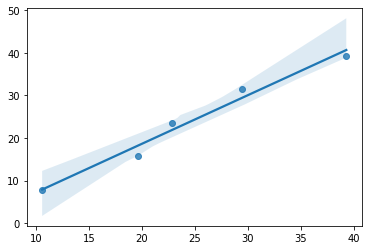

In [192]:
eng_diff = [1,2,3,4,5]
rate_inc = [10.6,19.6,22.9,29.5,39.3]

eng_df = pd.DataFrame(columns = ["eng_rate_change", "percent_diff"])
eng_df.eng_rate_change = eng_diff
eng_df.percent_diff = rate_inc
display(eng_df)

X = eng_df[["eng_rate_change"]]
y = eng_df["percent_diff"].values



model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)

#Manual Check
diff_ = 3
print("Predicted: ",model2.predict([[diff_]]))

# Coefficients
print("coefficient: ",model2.coef_)
print("intercept: ",model2.intercept_)
print("Score: ",model2.score(X,y))

# Ploting
pred_amount = model2.predict(X)
sns.regplot(y,pred_amount)

### With engagement rate

Predicted:  [187529.51335775]
coefficient:  [0.24583049 0.01875384]
intercept:  0.0


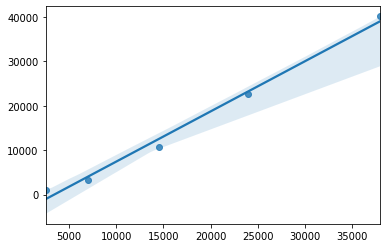

In [37]:
X = insta_video_df[["followers","engagement_number"]]
y = insta_video_df['amount'].values

model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)

#Manual Check
influ_followers = 760520
engg_num = (influ_followers/100)*4
print("Predicted: ",model2.predict([[influ_followers,engg_num]]))

# Coefficients
print("coefficient: ",model2.coef_)
print("intercept: ",model2.intercept_)

# Ploting
pred_amount = model2.predict(X)
sns.regplot(y,pred_amount)

In [38]:
# Transient Testing
insta_video_trans = pd.DataFrame(columns = ["followers","eng_rate","amount"])
for i in range(3000,250000,1000):
    rand_eng = random.randrange(200, 1300, 2)/100
    eng_num = i*rand_eng/100
    amount_pred = model2.predict([[i,eng_num]])
    pred_dict = {"followers":i,
                 "eng_rate":rand_eng,
                 "amount":amount_pred}
    insta_video_trans = insta_video_trans.append(pred_dict,ignore_index=True)

display(insta_video_trans)
insta_video_trans.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\NewM_Price_IGvideo_1.csv')

,followers,eng_rate,amount
0,3000,3.32,[739.3593615352987]
1,4000,6.70,[988.3480008866683]
2,5000,9.76,[1238.3043382567032]
3,6000,6.30,[1482.0719092282977]
4,7000,5.24,[1727.6923593519102]
...,...,...,...
242,245000,5.22,[60468.313639275875]
243,246000,9.92,[60931.95495269776]
244,247000,3.56,[60885.03804131837]
245,248000,7.38,[61309.20252665322]


### Without engagement rate

Predicted:  [233488.78829792]
coefficient:  [0.30701203]
intercept:  0.0


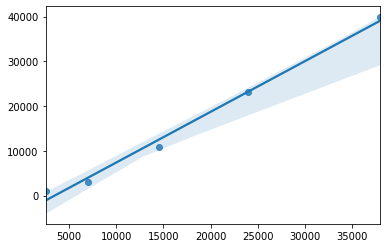

In [39]:
X = insta_video_df[["followers"]]
y = insta_video_df['amount'].values

model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)

#Manual Check
influ_followers = 760520
engg_num = (influ_followers/100)*4
print("Predicted: ",model2.predict([[influ_followers]]))

# Coefficients
print("coefficient: ",model2.coef_)
print("intercept: ",model2.intercept_)

# Ploting
pred_amount = model2.predict(X)
sns.regplot(y,pred_amount)

In [40]:
# Transient Testing
insta_video_trans = pd.DataFrame(columns = ["followers","eng_rate","amount"])
for i in range(3000,250000,1000):
    rand_eng = random.randrange(200, 1300, 2)/100
    eng_num = i*rand_eng/100
    amount_pred = model2.predict([[i]])
    pred_dict = {"followers":i,
                 "eng_rate":rand_eng,
                 "amount":amount_pred}
    insta_video_trans = insta_video_trans.append(pred_dict,ignore_index=True)

display(insta_video_trans)
insta_video_trans.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\NewM_Price_IGvideo_2.csv')

,followers,eng_rate,amount
0,3000,4.86,[921.0360870111911]
1,4000,7.46,[1228.0481160149216]
2,5000,9.18,[1535.0601450186518]
3,6000,8.22,[1842.0721740223821]
4,7000,12.88,[2149.0842030261124]
...,...,...,...
242,245000,7.04,[75217.94710591395]
243,246000,12.84,[75524.95913491768]
244,247000,3.86,[75831.97116392141]
245,248000,11.08,[76138.98319292514]


# Formula coding

In [1]:
def new_price_1(followers,eng_rate,story,image,video,reel,carousel):
    eng_num = followers*eng_rate/100
    num_post = story+image+video+reel+carousel
    video_rate = 0.24583049*followers + 0.01875384*eng_num
    if followers <= 10000:
        story_rate = video_rate*0.3
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
    if 10000 < followers <=100000:
        video_rate = video_rate*1.2
        story_rate = video_rate*0.5
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
    if 100000 < followers <=500000:
        video_rate = video_rate*1.2
        story_rate = video_rate*0.5
        image_rate = video_rate*0.75
        carousel_rate = video_rate*0.80
        reel_rate = video_rate*1.4
    if followers>500000:
        video_rate = video_rate*1.2
        story_rate = video_rate*0.5
        image_rate = video_rate*0.75
        carousel_rate = video_rate*0.8
        reel_rate = video_rate*1.4
    base_amount = story_rate*story+image_rate*image+video_rate*video+reel_rate*reel+carousel_rate*carousel
    if num_post>=3:
        discount_amount = base_amount*0.75
    if followers>500000 and (story+video)>2:
        discount_amount = base_amount*0.90
    if num_post<3:
        return base_amount
    else:
        return discount_amount

In [234]:
def new_price_2(followers,eng_rate,story,image,video,reel,carousel):
    eng_num = followers*eng_rate/100
    num_post = story+image+video+reel+carousel
    video_rate = 0.24583049*followers + 0.01875384*eng_num
    if followers <= 10000:
        story_rate = video_rate*0.3
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
    if 10000 < followers <=50000:
        story_rate = video_rate*0.6
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.35
    if 50000 < followers <=100000:
        story_rate = video_rate*0.3
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.3
    if 100000 < followers <=300000:
        story_rate = video_rate*0.3
        image_rate = video_rate*0.6
        carousel_rate = video_rate*0.65
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.3
    if 300000 <followers <= 800000 :
        story_rate = video_rate*0.3
        image_rate = video_rate*0.7
        carousel_rate = video_rate*0.75
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.45
    if 800000 <followers <= 1000000  :
        story_rate = video_rate*0.4
        image_rate = video_rate*0.7
        carousel_rate = video_rate*0.75
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.50
    if 1000000 <followers <= 3000000  :
        story_rate = video_rate*0.25
        image_rate = video_rate*0.55
        carousel_rate = video_rate*0.42
        reel_rate = video_rate*1.3
        video_rate = video_rate*1.3
    if followers > 3000000 :
        story_rate = video_rate*0.03
        image_rate = video_rate*0.40
        carousel_rate = video_rate*0.42
        reel_rate = video_rate*0.8
        video_rate = video_rate*0.9
    if followers <=5000000:
        base_amount = story_rate*story+image_rate*image+video_rate*video+reel_rate*reel+carousel_rate*carousel
    if followers>5000000:
        rate_dec = ((followers/1000000)-(5000000/1000000))*7.87272727
        video_rate = 0.24583049*5000000 + 0.01875384*eng_num
        story_rate = video_rate*0.03
        image_rate = video_rate*0.40
        carousel_rate = video_rate*0.42
        reel_rate = video_rate*0.8
        video_rate = video_rate*0.9
        base_amount = story_rate*story+image_rate*image+video_rate*video+reel_rate*reel+carousel_rate*carousel
        base_amount = base_amount*(1+rate_dec/100)
    if eng_rate > 2:
        base_amount = base_amount*(100+(1.14055527*eng_rate))/100
    if num_post>=3:
        discount_amount = base_amount*0.75
        return discount_amount
    else:
        return base_amount

In [3]:
def new_price_3(followers,eng_rate,story,image,video,reel,carousel):
    eng_num = followers*eng_rate/100
    num_post = story+image+video+reel+carousel
    video_rate = 0.24583049*followers + 0.01875384*eng_num
    if followers <= 10000:
        story_rate = video_rate*0.3
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
    if 10000 < followers <=100000:
        video_rate = video_rate*1.35
        story_rate = video_rate*0.6
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
    if 100000 < followers <=300000:
        video_rate = video_rate*1.35
        story_rate = video_rate*0.6
        image_rate = video_rate*0.6
        carousel_rate = video_rate*0.65
        reel_rate = video_rate*1.4
    if followers>300000:
        video_rate = video_rate*1.45
        story_rate = video_rate*0.7
        image_rate = video_rate*0.6
        carousel_rate = video_rate*0.7
        reel_rate = video_rate*1.4
    base_amount = story_rate*story+image_rate*image+video_rate*video+reel_rate*reel+carousel_rate*carousel
    if eng_rate > 2:
        base_amount = base_amount*(100+(4.9*math.sqrt(eng_rate)))/100
    if num_post>=3:
        discount_amount = base_amount*0.75
    if num_post<3:
        return base_amount
    else:
        return discount_amount

In [6]:
# new_price_1(followers,eng_rate,story,image,video,reel,carousel)
new_price_3(5333,4.7,1,0,1,0,0)

1892.127045058982

In [238]:
#Video
followers = 5000
eng_rate = 6

story = 1
image = 0
video = 0
reel = 0
carousel = 1

# story = 0
# image = 1
# video = 0
# reel = 0
# carousel = 0
print("Price 2 (story_video) : ", new_price_2(followers,eng_rate,story,image,video,reel,carousel))

story = 0
image = 0
video = 0
reel = 1
carousel = 0
print("Price 2 (Reel) : ", new_price_2(followers,eng_rate,story,image,video,reel,carousel))

story = 0
image = 1
video = 0
reel = 0
carousel = 0
print("Price 2 (image) : ", new_price_2(followers,eng_rate,story,image,video,reel,carousel))

story = 0
image = 0
video = 0
reel = 0
carousel = 1
print("Price 2 (carousel) : ", new_price_2(followers,eng_rate,story,image,video,reel,carousel))


Price 2 (story_video) :  1055.422877206128
Price 2 (Reel) :  1846.990035110724
Price 2 (image) :  659.63929825383
Price 2 (carousel) :  659.63929825383


Price 1 :  6218.5581864
Price 2 :  7394.837233460634
Price 3 :  7762.397635028905


## Testing Formula

In [51]:
insta_data = pd.read_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\InstagramData.csv')
display(insta_data.head())
insta_pred_new = pd.DataFrame(columns = ["followers","avg_engagement","insta_image","insta_story","insta_video","insta_reel","insta_carousel","amount","pred_amount"])
for i in insta_data.index:
    push_dict= {"followers":insta_data.followers.loc[i],
                "avg_engagement":insta_data.avg_engagement.loc[i],
                "insta_image":insta_data.insta_image.loc[i],
                "insta_story":insta_data.insta_story.loc[i],
                "insta_video":insta_data.insta_video.loc[i],
                "insta_reel":insta_data.insta_reel.loc[i],
                "insta_carousel":insta_data.insta_reel.loc[i],
                "amount":insta_data.amount.loc[i],
                "pred_amount":new_price_1(insta_data.followers.loc[i],insta_data.avg_engagement.loc[i],insta_data.insta_story.loc[i],insta_data.insta_image.loc[i],insta_data.insta_video.loc[i],insta_data.insta_reel.loc[i],insta_data.insta_carousel.loc[i])
    }
    insta_pred_new = insta_pred_new.append(push_dict,ignore_index=True)
display(insta_pred_new)
insta_pred_new.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\NewM_price_FullCheck.csv')

,Unnamed: 0,insta_user_id,followers,avg_engagement,avg_likes,avg_comments,insta_image,insta_story,insta_video,insta_reel,insta_carousel,amount
0,108,292988,3111,1.79,47.50,8.08,1,1,0,0,0,300
1,41,268867,3325,18.01,594.42,4.50,0,4,1,0,0,2000
2,231,313758,3897,6.86,244.58,22.92,1,1,0,0,0,300
3,239,254680,4062,2.40,95.08,2.50,1,1,0,0,0,300
4,31,308540,4207,3.04,121.00,6.92,0,2,1,0,0,1000


,followers,avg_engagement,insta_image,insta_story,insta_video,insta_reel,insta_carousel,amount,pred_amount
0,3111.0,1.79,1.0,1.0,0.0,0.0,0.0,300.0,6.126584e+02
1,3325.0,18.01,0.0,4.0,1.0,0.0,0.0,2000.0,1.367218e+03
2,3897.0,6.86,1.0,1.0,0.0,0.0,0.0,300.0,7.704120e+02
3,4062.0,2.40,1.0,1.0,0.0,0.0,0.0,300.0,8.003134e+02
4,4207.0,3.04,0.0,2.0,1.0,0.0,0.0,1000.0,1.243929e+03
...,...,...,...,...,...,...,...,...,...
237,760520.0,5.47,3.0,4.0,3.0,0.0,0.0,180000.0,1.469998e+06
238,760520.0,5.47,0.0,1.0,1.0,0.0,0.0,55000.0,3.379305e+05
239,763901.0,3.00,0.0,1.0,1.0,0.0,0.0,80000.0,3.387959e+05
240,915864.0,8.00,0.0,1.0,1.0,0.0,0.0,2222.0,4.077385e+05
